In [123]:
#!/usr/bin/python
import random
import pydot

from IPython.display import Image, display

class Node:
    """
    Node class contains 3 values 
    self.v conteins the node's value (1-2-3-100-...)
    self.l links the node with other node to the left
    self.r links the node with other node to the right
    """
    def __init__(self, val):
        self.l = None
        self.r = None
        self.v = val

class Tree:
    """
    This class conteins the Tree's structure adds, prints
    and implements de BFS and DFS algorithms 
    """
    def __init__(self):
        self.root = None
        self.ary_nodes = list()
        self.DFS_cont = 0
        self.G = None

    def add(self, total):
        """
        Adds x total values to the tree with random values
        from 1 to 100
        """
        for i in range(0, total):
            num = random.randint(1, 100)
            self.ary_nodes.append(num)
            if(self.root == None):
                self.root = Node(num)
            else:
                self._add(num, self.root)

    def _add(self, val, node):
        """
        Auxiliary function to add, it randomly decides which side 
        to add the new sub-node
        """
        side = random.uniform(0,1)
        if(side < 0.5):
            if(node.l != None):
                self._add(val, node.l)
            else:
                node.l = Node(val)
        else:
            if(node.r != None):
                self._add(val, node.r)
            else:
                node.r = Node(val)

    def DFS(self, val):
        """
        DFS implementation, first checks if the tree has root
        """
        if(self.root != None):
            return self._DFS(val, self.root)
        else:
            return None

    def _DFS(self, val, node):
        """
        DFS auxiliary function, it goes through the tree recursively first the 
        left nodes and then the rigth ones, if it finds the value return true
        uses the stack
        """
        if(node == None):
            return False
        elif(val == node.v):
            self.DFS_cont += 1
            return True
        self.DFS_cont += 1
        return self._DFS(val, node.l) or self._DFS(val, node.r)
            
    def BFS(self, search):
        """
        BFS function, it goes through the tree iterative by level using queue
        it starts with the root, checks if it has the looking value and returns
        the count of nodes recover it that moment if not it keeps looking the
        value in the next level 
        """
        cont = 0
        current_level = [self.root]
        while current_level:
            for node in current_level:
                cont += 1
                if(node.v == search):
                    return cont
            next_level = list()
            for n in current_level:
                if n.l:
                    next_level.append(n.l)
                if n.r:
                    next_level.append(n.r)
                current_level = next_level
        print ("contador {}".format(cont))
        return -1

    def get_random_node(self):
        """
        returns a random value of the tree  
        """
        rand_pos = random.randint(0, len(self.ary_nodes)-1)
        return self.ary_nodes[rand_pos]
    
    def print_tree(self):
        """
        Prints the tree using pydot, creates the digraph calls the
        auxiliary function and then prints it
        """
        self.G = pydot.Dot(graph_type='digraph')
        self._print_tree(self.root)
        im = Image(self.G.create_png())
        display(im)
    
    def _print_tree(self, node):
        """
        Goes through the tree at the same time creates nodes and links then to its sons
        using DSF algorithm
        """
        if(node != None):
            nodes = pydot.Node(str(node.v), style='filled', fillcolor='mediumaquamarine')
            self.G.add_node(nodes)
            next_node_l = self._print_tree(node.l)
            if next_node_l != None:
                edge = pydot.Edge(nodes, next_node_l, fillcolor='coral')
                self.G.add_edge(edge)
            next_node_r = self._print_tree(node.r)
            if next_node_r != None:
                edge = pydot.Edge(nodes, next_node_r, fillcolor='coral')
                self.G.add_edge(edge)
            return nodes
        else:
            return None
    
class tree_search():
    """
    This function tests the tree
    """
    def __init__(self, size):
        self.tree = Tree()
        self.tree.add(size)
    
    def test_trees(self):
        """
        Creates the tree, and set the nesesary values to analize the data
        Then it calls the BFS and DFS 10000 times and prints the results.
        """
        self.tree.print_tree()
        BFS_cont = DFS_cont = 0
        BFS_diff = DFS_diff = 0
        BFS_success = 0
        iterations = 10000
        for i in range(0, iterations):
            goal = self.tree.get_random_node()
            BFS_cont += self.tree.BFS(goal)
            self.tree.DFS(goal)
            DFS_cont += self.tree.DFS_cont
            self.tree.DFS_cont = 0
            diff = BFS_cont - DFS_cont
            if(diff > 0):
                BFS_diff += diff
                BFS_success += 1
            else:
                DFS_diff += diff * -1
        
        print("BFS -> cont {} diff {} succ {}, DFS-> cont {} diff {}".format(BFS_cont, BFS_diff, BFS_success, DFS_cont, DFS_diff))    
        print("BFS -> Éxitos: {} promedio de diferencia en saltos: {} ".format(BFS_success, BFS_diff/BFS_success))
        print("DFS -> Éxitos: {} promedio de diferencia en saltos: {} ".format(iterations-BFS_success, DFS_diff/(iterations-BFS_success)))


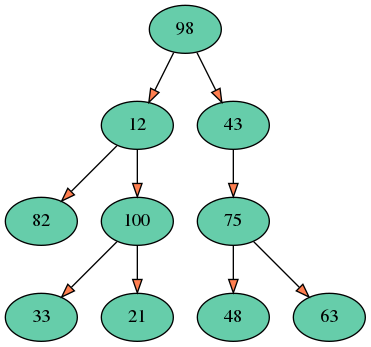

BFS -> cont 55144 diff 963184 succ 9234, DFS-> cont 55085 diff 16031
BFS -> Éxitos: 9234 promedio de diferencia en saltos: 104 
DFS -> Éxitos: 766 promedio de diferencia en saltos: 20 


In [130]:
test_tree = tree_search(10)
test_tree.test_trees()
